In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf


In [81]:
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
#     print(data)
    return data[['Close']]
    
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)
    train_size = int(len(scaled_data) * 0.7)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]
    
    return train_data, test_data, scaler

def create_datasets(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)


def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_and_evaluate_model(X_train, X_test,y_train,y_test, scaler):
    print(f'X_train shape: {X_train.shape}')
    print(f'X_test shape: {X_test.shape}')
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f'Root Mean Squared Error: {rmse}')
    print(f'model accuracy:{r2}')
    return model, predictions


def plot_results(test_data, predictions, scaler):
    test_data = scaler.inverse_transform(test_data)    
    plt.figure(figsize=(14, 7))
    plt.plot(test_data, color='blue', label='Actual Prices')
    plt.plot(range(len(test_data) - len(predictions), len(test_data)), predictions, color='red', label='Predicted Prices')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [82]:


ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2024-01-01'

data = get_stock_data(ticker, start_date, end_date)
print(data)


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2022-01-03  182.009995
2022-01-04  179.699997
2022-01-05  174.919998
2022-01-06  172.000000
2022-01-07  172.169998
...                ...
2023-12-22  193.600006
2023-12-26  193.050003
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999

[501 rows x 1 columns]


(290, 60, 1)
X_train shape: (290, 60)
X_test shape: (91, 60)


C:\Users\my pc\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0825
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0139
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0133
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0084
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0078
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0057
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0057
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0059
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0046
Epoch 13/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0047
Epoch 14/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046
Epoch 15/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

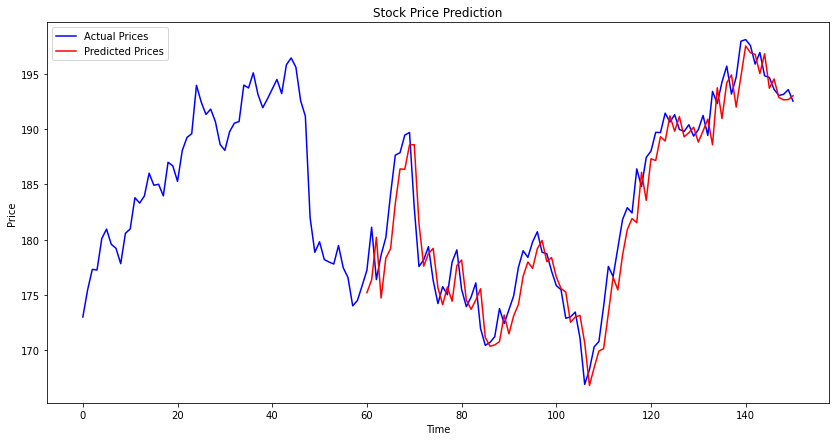

In [83]:
train_data, test_data, scaler = preprocess_data(data)
# print(train_data.size)
# print(scaler)
# predictions = train_and_evaluate_model(train_data, test_data, scaler)
# plot_results(test_data, predictions, scaler)
look_back = 60
X_train, y_train = create_datasets(train_data, look_back)
X_test, y_test = create_datasets(test_data, look_back)
# print(X_test)
# print(y_test)
# print(test_data.shape)
# # print(X_train.shape)
X_train_new=np.stack(X_train)
print(X_train_new.shape)
X_train_new = X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1])
# print(X_test)
X_test_new=np.stack(X_test)
X_test_new = X_test_new.reshape(X_test_new.shape[0], X_test_new.shape[1])
model,predictions=train_and_evaluate_model(X_train_new, X_test_new,y_train,y_test, scaler)
plot_results(test_data, predictions, scaler)